<a href="https://colab.research.google.com/github/Grivine-19/Financial-Inclusion/blob/main/financial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>**FINANCIAL INCLUSION**</center>

## **Overview**

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa, and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enable households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other finance services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

## **Objective**

The objective of this project is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

## **Dataset**

1. A Variables file - a csv file containing descriptions of all the columns in the training and test datasets below.

2. A training set - a csv file containing different interviewee demographics and whether or not they have a bank account.

3. A test set - a csv file containig the demographics from different interviewees. This is the file we use for predictions.

Source: [Link](https://zindi.africa/competitions/financial-inclusion-in-africa/data)

## **Approach**


### Tools


*   Streamlit
*   Numpy
*   Pandas
*   ScikitLearn
*   Matplotlib
*   Seaborn
*   Scipy
*   List item




### Steps

1. Exploratory Data Analysis

2. Data Cleaning

3. Data Analysis

4. Modelling

5. Testing

6. Publishing - Data App 

In [ ]:
#KEY INDICATORS IN MODELING: pple likely to open a bnk ac and use it
#Screening criteria to be used by bank owners
#Output for classification; probability

## Import data & dependancies

In [ ]:
# Reading data and data manipulation
import pandas as pd
# Mathematical operations and working with arrays
import numpy as np
# Import Matplotlib a library used for visualisations
import matplotlib.pyplot as plt
# import seaborn , a visualisation library.
import seaborn as sns
#Statistical library
from scipy import stats
#Google Drive folder
from google.colab import  drive

In [ ]:
#Mount Google drive folder

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#load the dataset

finance = pd.read_csv('/content/gdrive/My Drive/dsproj_kamilimu/financial.csv')

#View the first few rows of the dataset

finance.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


## Inspecting the data


In [ ]:
print("Number of columns: " + str(finance.shape[1]))
print("Number of rows: "  + str(finance.shape[0]))

Number of columns: 13
Number of rows: 23524


In [ ]:
# Number of records in our dataset
finance.count()

country                   23524
year                      23524
uniqueid                  23524
bank_account              23524
location_type             23524
cellphone_access          23524
household_size            23524
age_of_respondent         23524
gender_of_respondent      23524
relationship_with_head    23524
marital_status            23524
education_level           23524
job_type                  23524
dtype: int64

In [ ]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [ ]:
# Summary statistics of the finance dataframe.
finance.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [ ]:
# Range of data.
finance.index

RangeIndex(start=0, stop=23524, step=1)

In [ ]:
# Columns
finance.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [ ]:
# Unique items in each item column
finance.nunique()

country                      4
year                         3
uniqueid                  8735
bank_account                 2
location_type                2
cellphone_access             2
household_size              20
age_of_respondent           85
gender_of_respondent         2
relationship_with_head       6
marital_status               5
education_level              6
job_type                    10
dtype: int64

In [ ]:
# Countries
finance['country'].unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

In [ ]:
# Unique IDs
finance['uniqueid'].unique()

array(['uniqueid_1', 'uniqueid_2', 'uniqueid_3', ..., 'uniqueid_8757',
       'uniqueid_8758', 'uniqueid_8759'], dtype=object)

In [ ]:
# Unique job types
finance['job_type'].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

In [ ]:
# Unique genders
finance['gender_of_respondent'].unique()

array(['Female', 'Male'], dtype=object)

## Data cleaning

In [ ]:
#Dealing with missing values

finance.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [ ]:
#Checking for duplicates

print(finance.duplicated().any())

False


In [ ]:
#Checking outliers

num = ['age_of_respondent']
for i, col in enumerate(num):
    z = np.abs(stats.zscore(finance[col]))
print(z)

[0.89618796 1.88827897 0.77512418 ... 0.71459229 0.53299662 1.13831551]


In [ ]:
#Confirming that our outliers have been dropped from the data set

finance2 = finance[( z < 2 )]

print(f"Previous dataframe size : {finance.shape[0]}" )
print(f"New dataframe size : {finance2.shape[0]}" )

Previous dataframe size : 23524
New dataframe size : 22390


In [ ]:
finance2.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


## Exploratory Data Analysis

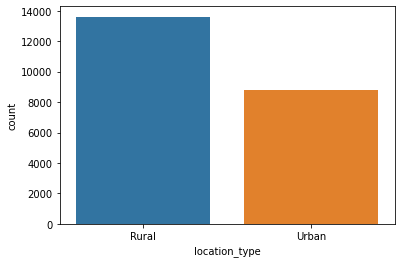

In [ ]:
# #Let us see how many counts we have of each location_type

finance2['location_type'].value_counts()
sns.countplot(x='location_type',data=finance2)

'A count plot to check for how education level compares to posession of a bank account reveals that a large number with tertiary and \nvocational education have bank accounts while a greater percentage of those with primary level of education do not have bank accounts.'

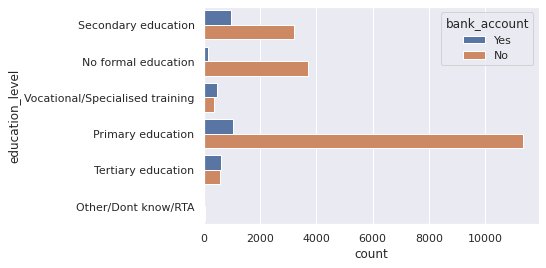

In [ ]:
#How education level affects bank account ownership

sns.set_theme(style="darkgrid")
sns.countplot(y='education_level',data=finance2, hue='bank_account')

"""A count plot to check for how education level compares to posession of a bank account reveals that a large number with tertiary and 
vocational education have bank accounts while a greater percentage of those with primary level of education do not have bank accounts."""

'There are more married pple with bank accounts compared to the rest.'

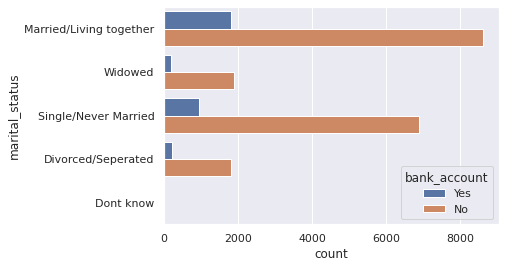

In [ ]:
#How bank account ownership is affected by marital statuses

sns.countplot(y='marital_status',data=finance2, hue='bank_account')

"""There are more married pple with bank accounts compared to the rest."""
#Investigate this graph for different countries

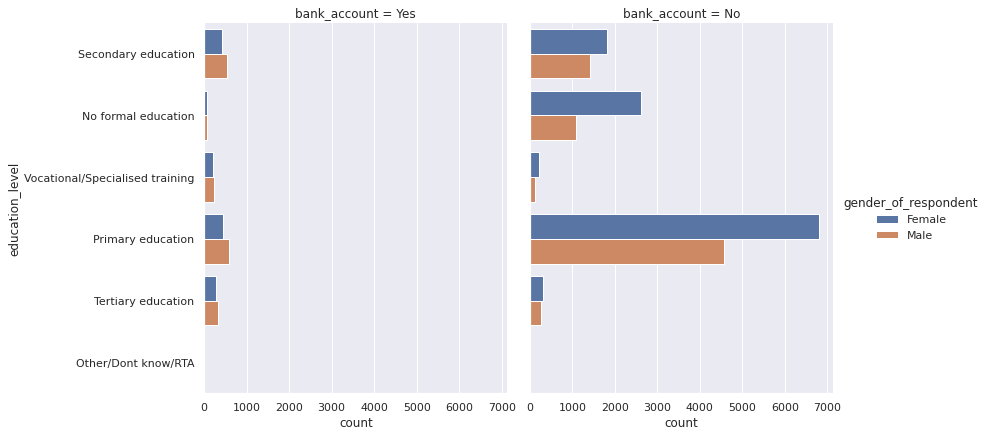

In [ ]:
g = sns.catplot(y="education_level", hue="gender_of_respondent", col="bank_account",
                data=finance2, kind="count",
                height=6, aspect=1.0);
                

'education>>bank account/cellphone access\njob type >> bank account/cellphone access'

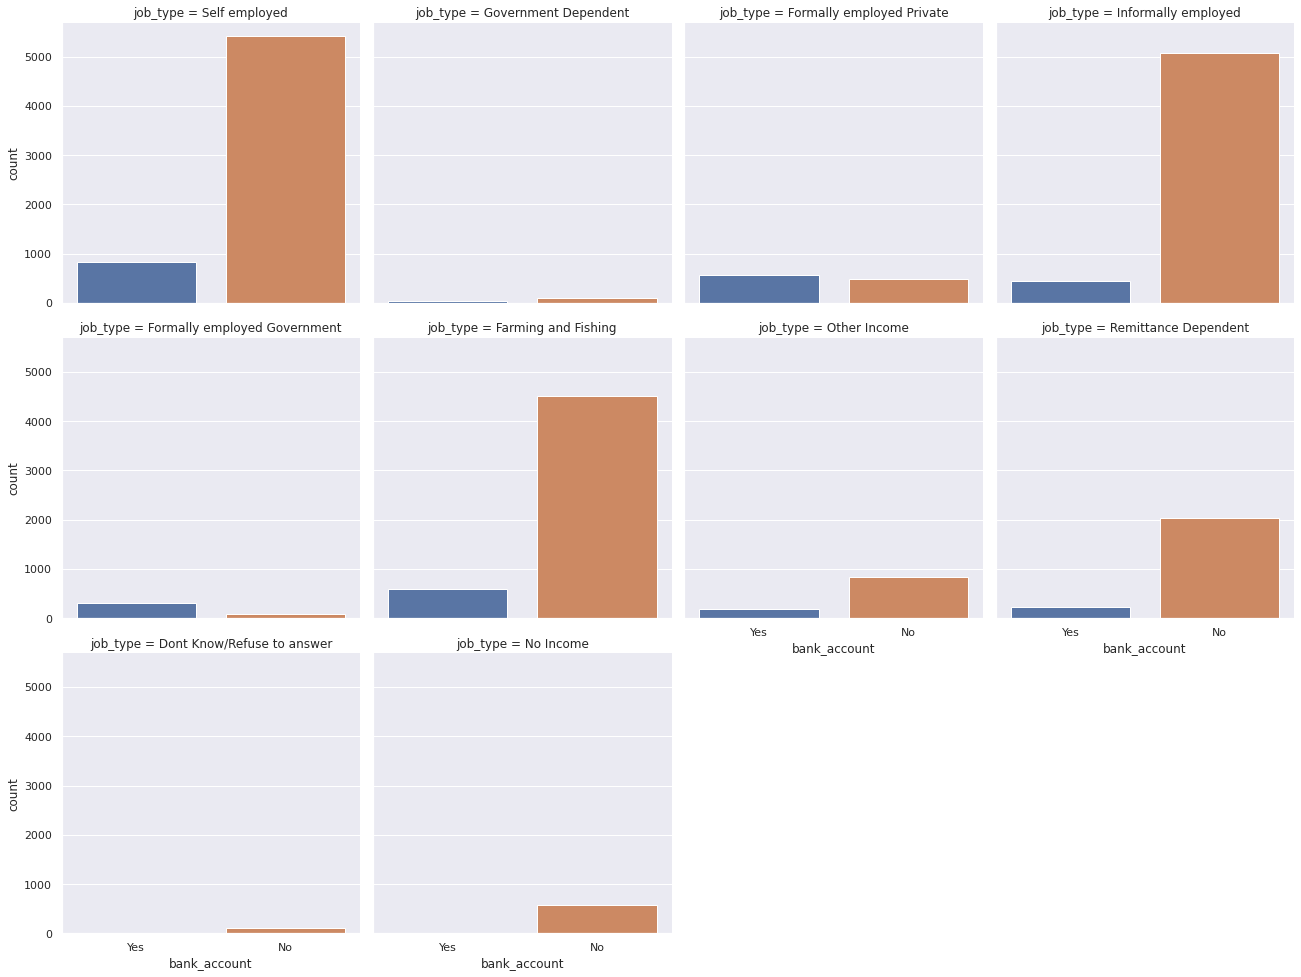

In [ ]:
g = sns.catplot(x="bank_account", col="job_type", col_wrap=4,
                data=finance2[finance2.job_type.notnull()],
                kind="count", height=4.5, aspect=1.0)

#Cant clearly visualize the level of education;features with many categorical variables. How to solve this?
#Change to violin or bar by introducing a y parameter to the code
"""education>>bank account/cellphone access
job type >> bank account/cellphone access"""

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:2999: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 86.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 80.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 63.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 29.4% of the points cannot be placed; you may want to decrease the size of the markers or use

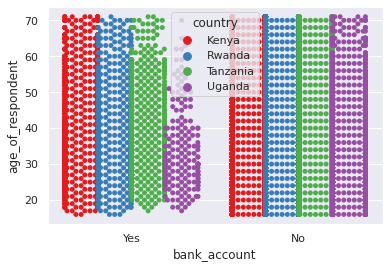

In [ ]:
sns.swarmplot(x="bank_account",y="age_of_respondent",hue='country',data=finance2,palette="Set1", split=True)

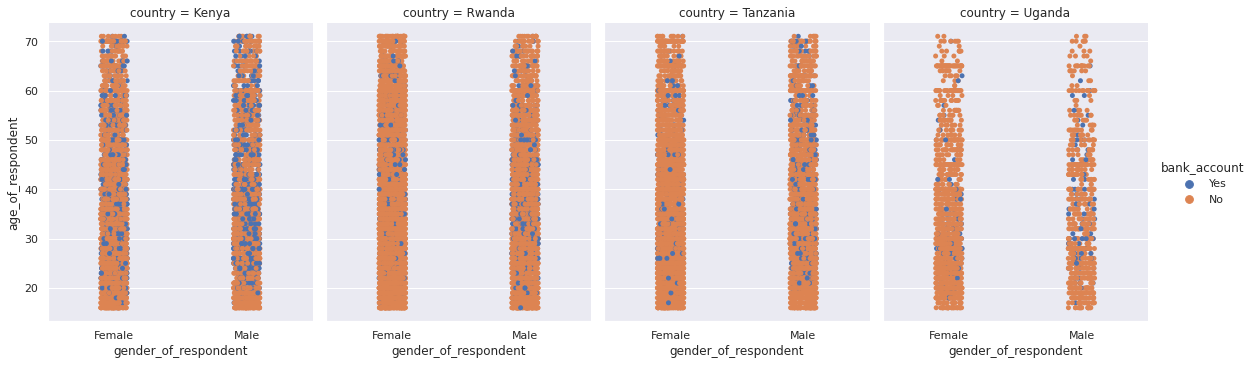

In [ ]:
g = sns.catplot(x="gender_of_respondent", y="age_of_respondent", hue="bank_account",
                col="country", data=finance2,
                height=5, aspect=.8)